<a href="https://colab.research.google.com/github/DmitriiPushkarev/PythonHomework/blob/main/Task_1_and_2_dmrf_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lectures-python/Python_lectures_HW/blob/main/HW/Task1_dmrf.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe
* Cохранить pandas dataframe в excel
* Cохранить pandas dataframe в pickle
* Cохранить pandas dataframe в БД

# Задание *
* Написать скрипт, который скачивает фотографии всех строящихся объектов с сайта "наш.дом.рф"


In [2]:
import requests
import json
from pandas import json_normalize

## Список объектов

In [3]:
# Для скачивания данных по

offset_ = 1
limit_ = 100
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()
objects_data.get('data').get('list')[0]

{'objId': 13383,
 'developer': {'devId': 306,
  'shortName': '2МЕН ГРУПП',
  'fullName': '2МЕН ГРУПП',
  'groupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
  'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
  'companyGroup': 5776,
  'devInn': '7701651356'},
 'rpdRegionCd': 72,
 'objAddr': 'г Тюмень',
 'objFloorMin': 4,
 'objFloorMax': 20,
 'objElemLivingCnt': 68,
 'objReady100PercDt': '2022-12-31',
 'objSquareLiving': 6293.78,
 'objCompensFundFlg': 1,
 'objProblemFlg': 0,
 'latitude': 57.1519,
 'longitude': 65.5536,
 'problemFlag': 'NONE',
 'siteStatus': 'Строящиеся',
 'objGuarantyEscrowFlg': 0,
 'residentialBuildings': 1,
 'rpdNum': '72-000095',
 'pdId': 28105,
 'buildType': 'Жилое',
 'objStatus': 0}

In [4]:
objects_list = objects_data.get('data').get('list')
objids = [x.get('objId') for x in objects_list]
objids[:10]

[13383, 13397, 13399, 13398, 13391, 36912, 44076, 27476, 10891, 39176]

# Объекты по ID

In [5]:
# Для скачивания данных по определенному объекту, нужно добавить его id в конец строки запроса
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/29679'

In [8]:
res = requests.get(url)
res.json()

{'data': {'id': 29679,
  'pdId': 124647,
  'developer': {'devId': 7424,
   'devShortCleanNm': '212-2',
   'devShortNm': '212-2',
   'devFullCleanNm': '212-2',
   'problObjCnt': 0,
   'buildObjCnt': 1,
   'comissObjCnt': 0,
   'regRegionDesc': 'Ростовская область',
   'devPhoneNum': '+7(961)285-90-10',
   'devSite': 'taganrogjsk.wixsite.com',
   'devEmail': 'kirpol76@gmail.com',
   'devInn': '6154572922',
   'devOgrn': '1116154005923',
   'devKpp': '615401001',
   'devLegalAddr': 'Ростовская область, город Таганрог, улица Свободы/Трудовых резервов дом 25/9',
   'devFactAddr': 'обл Ростовская город Таганрог улица Сергея Шило д. 212-2',
   'lastRpdId': 126093,
   'fundGuarantyFlg': 0,
   'devOrgRegRegionCd': 61,
   'devEmplMainFullNm': 'Снимщикова Ольга Викторовна',
   'orgForm': {'id': 20,
    'fullForm': 'Жилищный или жилищно-строительный кооператив',
    'shortForm': 'ЖСК'},
   'objGuarantyEscrowFlg': 0,
   'govFundFlg': 0},
  'region': 61,
  'address': 'г Таганрог',
  'objElemLivingCn

In [7]:
all_objects = []

for objId in objids:
    url_object = (f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objId}')
    res = requests.get(url_object)
    all_objects.append(res.json().get('data'))

len(all_objects)

100

# Датафрейм в excel

In [9]:
import pandas as pd


In [10]:
df = pd.DataFrame(all_objects)

In [11]:
df.head()

,id,pdId,developer,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,13383,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,г Тюмень,4,20,68,2022-12-31,Другое,...,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13399,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,28101,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,...,0,B,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.to_excel (r'dataframe.xlsx', index = False, header=True)

In [13]:
df.shape

(100, 67)

# Рассчитать средние цены за квадратный метр по регионам

In [14]:
import seaborn as sns

In [15]:
df_prices = df.dropna(subset=['objPriceAvg'])
pd.set_option('display.max_columns', None)

regions = requests.get('https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/dictionary/regions').json()
regions_dict = dict((region['id'], region['name']) for region in regions)

prices_by_region = df_prices.replace({"region": regions_dict}).groupby(['region'])['objPriceAvg'].mean()

prices_by_region.head()

region
Алтайский край              16438.000000
Вологодская область         44102.000000
Город Москва               242732.250000
Калининградская область     39853.000000
Краснодарский край          97402.434783
Name: objPriceAvg, dtype: float64

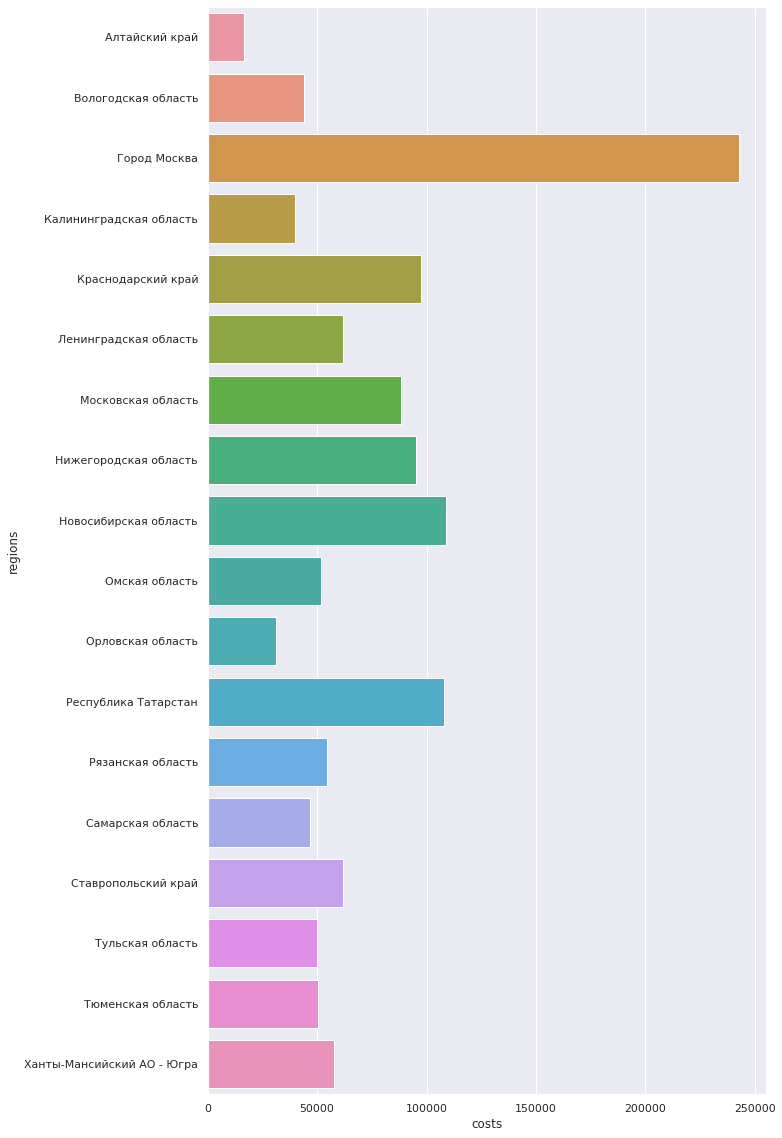

In [16]:
sns.set_theme()

prices_df = prices_by_region.reset_index()
prices_df.columns = ['regions', 'costs']

sns.set(rc = {'figure.figsize':(10,20)})
sns.barplot(y = 'regions', x = 'costs', data = prices_df)

Наибольшая цена за квадратный метр в городе Москва, меньшая цена в Алтайском крае исходя и графика выше. Использовались не все строящееся объекты, так как их загрузка идет слишком долго.

# Рассчитать объемы вводимого жилья по регионам и по годам

In [17]:
df_region_year = df.replace({"region": regions_dict})

df_region_year['objReady100PercDt'] = pd.to_datetime(df_region_year['objReady100PercDt']).dt.year
df_region_year = df_region_year.rename(columns={'objReady100PercDt':'year', 'id':'amount'})

df_region_year.head()

,amount,pdId,developer,region,address,floorMin,floorMax,objElemLivingCnt,year,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,quartography,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,13383,28105,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,г Тюмень,4,20,68,2022,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,05-10-2022 01:37,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6269...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,39024,20,68,6293.78,10,"{'objLivElem1KCnt': 13, 'objLivElem2KCnt': 21,...",0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,11.0,1,1,0.0,5.0,1.0,7,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,05-10-2022 01:37,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 6328...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6248.51,70,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 24, ...",0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,11.0,10.0,1,1,0.0,5.0,4.0,9,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,[],False,info@2mengroup.ru,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13399,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,05-10-2022 01:37,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 6328...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,34754,1,0,0.0,0,NaN,0,True,28-02-2025 12:00,NaN,0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,8.0,7.0,15,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1,[],False,info@2mengroup.ru,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,28141,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,05-10-2022 01:37,"[{'objId': 13398, 'pdId': 28141, 'rpdId': 6328...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37165,10,43,4812.98,48,"{'objLivElem1KCnt': 0, 'objLivElem2KCnt': 11, ...",0,True,28-02-2025 12:00,"2,96",0,1.0,1.0,1.0,4.0,15.0,1,1,0.0,3.0,3.0,6,1.000000,47886.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0,[],False,info@2mengroup.ru,0,B,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,28101,"{'devId': 306, 'devShortCleanNm': '2МЕН ГРУПП'...",Тюменская область,"г Тюмень, ул Профсоюзная",3,12,44,2022,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:14,57.1541,65.5595,1,0,Элитный,05-10-2022 01:37,"[{'objId': 1

In [18]:
df_res = df_region_year.groupby(['year', 'region']).count().reset_index()

df_res.head()

,year,region,amount,pdId,developer,address,floorMin,floorMax,objElemLivingCnt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,quartography,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,metro
0,2022,Город Москва,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,1,1,23,23,23,23,23,23,23,23,1,1,23,23,23,0,0
1,2022,Калининградская область,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0
2,2022,Краснодарский край,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,9,9,9,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,5,9,9,9,9,9,9,9,0,0,8,0,0,0,0
3,2022,Ленинградская область,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0
4,2022,Нижегородская область,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,0,0,0,0


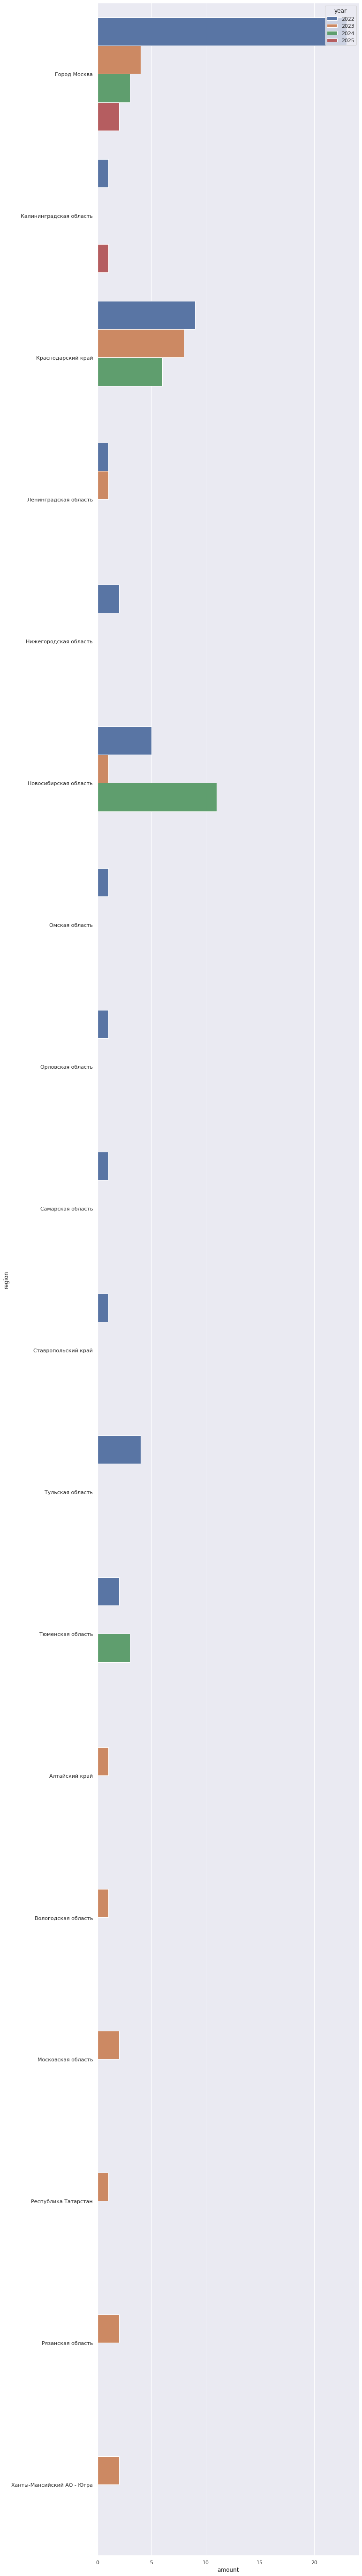

In [19]:
pd.set_option('display.max_rows', 15)
sns.set(rc = {'figure.figsize':(10,100)})

sns.barplot(x = 'amount', y = 'region', hue='year', data = df_res)

Большая часть строящехся объектов будут готов с 2022 года по 2024. Больше всего объектов в Москве. 

# Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах

In [21]:
df_region = df.replace({"region": regions_dict})
df_region = df_region.dropna(subset=['objSquareLiving','objFloorCnt','objFlatCnt','objPriceAvg'])
df_region = df_region[['region','objSquareLiving','objFloorCnt','objFlatCnt', 'objElemParkingCnt','objPriceAvg']]

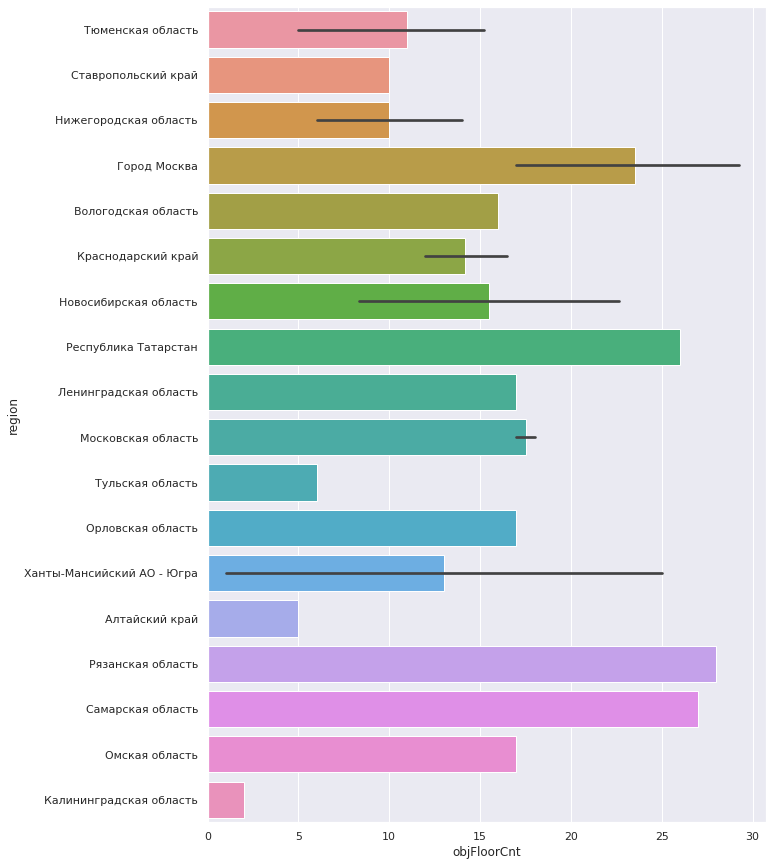

In [25]:
sns.set(rc = {'figure.figsize':(10,15)})

sns.barplot(y = 'region', x = 'objFloorCnt', data = df_region)

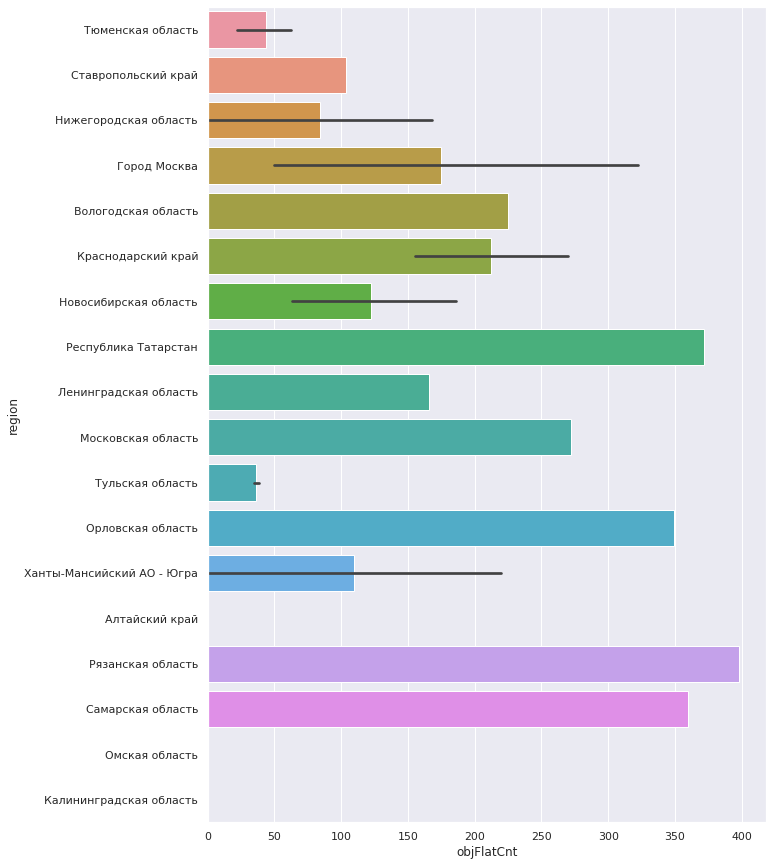

In [26]:
sns.barplot(y = 'region', x = 'objFlatCnt', data = df_region)

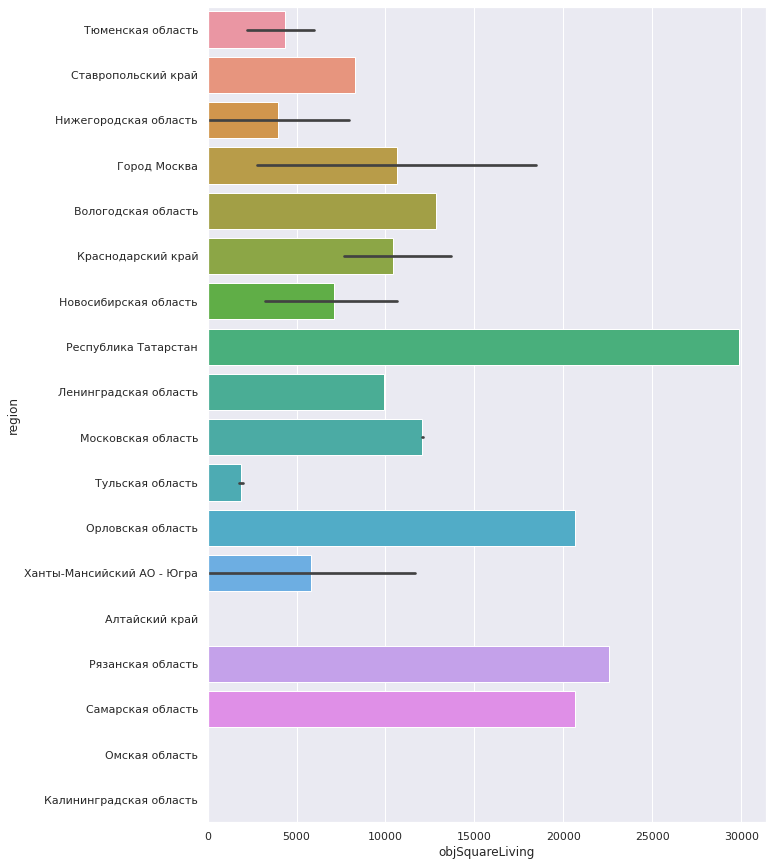

In [27]:
sns.barplot(y = 'region', x = 'objSquareLiving', data = df_region)

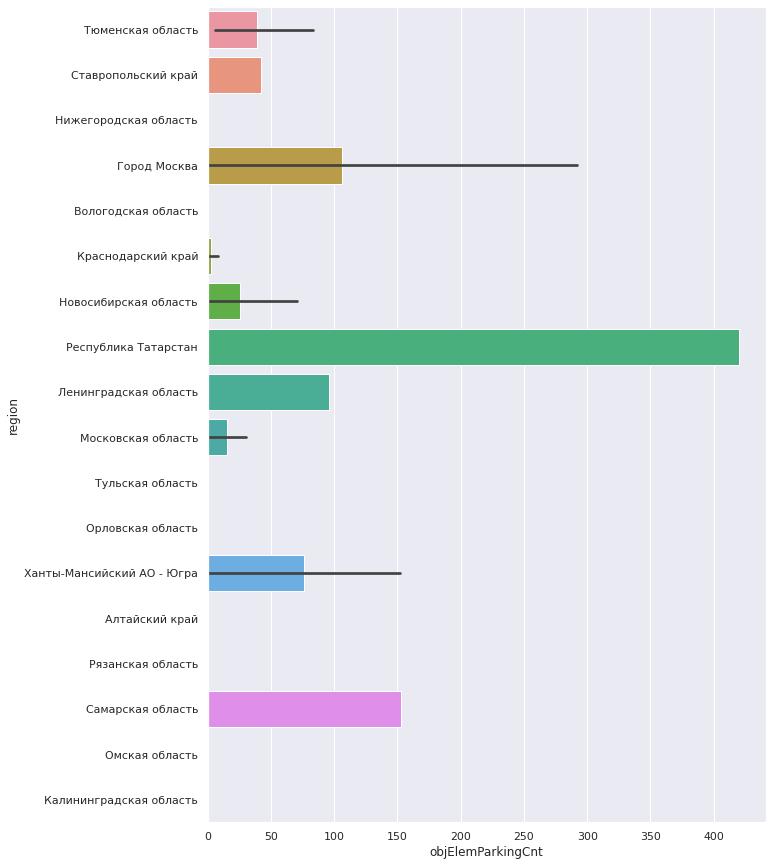

In [28]:
sns.barplot(y = 'region', x = 'objElemParkingCnt', data = df_region)

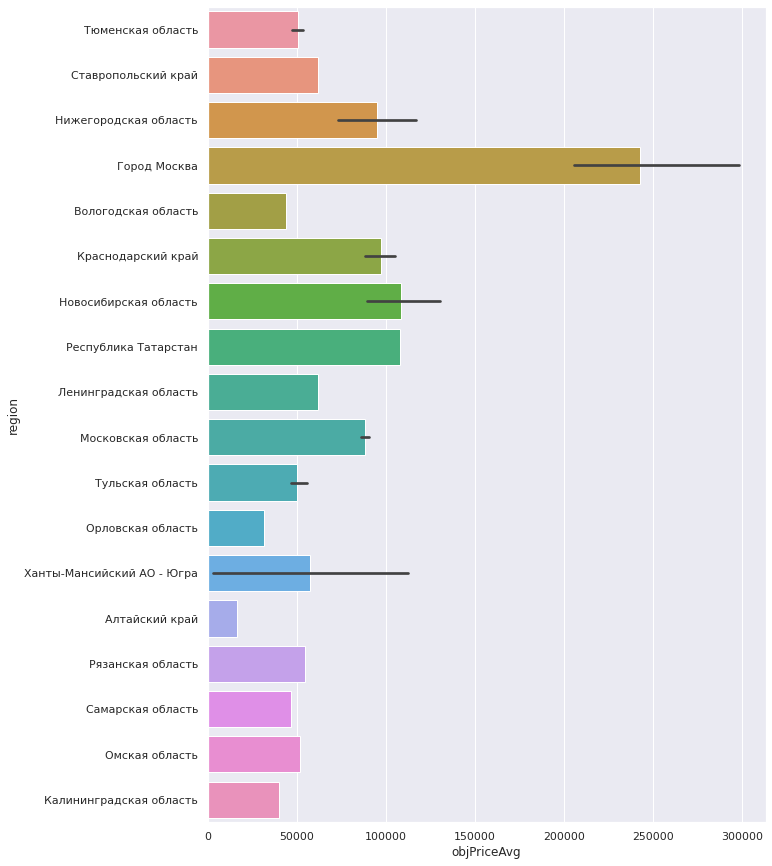

In [29]:
sns.barplot(y = 'region', x = 'objPriceAvg', data = df_region)

Парковочных мест больше всего в Татарстане. Наибольшая стомоисть за квадратный метр в Москве. Наибольшая жилая площадь в Татарстане. Самые высокие здания и набольшее число квартир в Рязанской области. Я не знаю что за черные линии на графиках